In [1]:

import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import pingouin as pg

# solidity aspect ratio vergence

## import data

In [51]:
folder = "D:/Internship/NTU/nellie_output/nellie_output/toxins/"

stream_file = ['control','FCCP','oligomycin','Rotenone']

folder = "D:/Internship/NTU/nellie_output/nellie_output/toxins/"
all_df1 = pd.DataFrame()
max_size = 137

for s in range(len(stream_file)):
    im_concen = stream_file[s]
    file_path_feature = folder + "time_ins_" + im_concen + ".ome-ch0-features_image.csv"
    df = pd.read_csv(file_path_feature)
    mini_df = df[['t', 'aspect_ratio_mean','length_mean','lin_vel_mean_1'] ]
    mini_df['stream'] = im_concen
    mini_df = mini_df.rename(columns={'lin_vel_mean_1': 'velocity'})
    
    if len(mini_df) > max_size:
        mini_df = mini_df.iloc[:max_size, :]
    
    all_df1 = pd.concat([all_df1, mini_df], ignore_index=True)


C:\Users\iceji\AppData\Local\Temp\ipykernel_31992\231829849.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_df['stream'] = im_concen
C:\Users\iceji\AppData\Local\Temp\ipykernel_31992\231829849.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_df['stream'] = im_concen
C:\Users\iceji\AppData\Local\Temp\ipykernel_31992\231829849.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [52]:
folder = "D:/Internship/NTU/nellie_output/nellie_output/new_toxin1/"

stream_file = ['control','FCCP','oligomycin','Rotenone']

all_df_2 = pd.DataFrame()
max_size = 144

for file in os.listdir(folder):
    if not file.endswith("features_image.csv"):
        continue
    im_concen = stream_file[s]
    file_path_feature = folder + file
    df = pd.read_csv(file_path_feature)
    mini_df = df[['t',  'branch_aspect_ratio_mean','branch_length_mean' ,'lin_vel_mag_rel_mean']]
    mini_df['stream'] = im_concen
    mini_df = mini_df.rename(columns={'branch_aspect_ratio_mean': 'aspect_ratio_mean'})
    mini_df = mini_df.rename(columns={'branch_length_mean': 'length_mean'})
    mini_df = mini_df.rename(columns={'lin_vel_mag_rel_mean': 'velocity'})
    
    if len(mini_df) > max_size:
        mini_df = mini_df.iloc[:max_size, :]
    
    all_df_2 = pd.concat([all_df_2, mini_df], ignore_index=True)

C:\Users\iceji\AppData\Local\Temp\ipykernel_31992\1204546824.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_df['stream'] = im_concen
C:\Users\iceji\AppData\Local\Temp\ipykernel_31992\1204546824.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_df['stream'] = im_concen
C:\Users\iceji\AppData\Local\Temp\ipykernel_31992\1204546824.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [53]:
folder = "D:/Internship/NTU/nellie_output/nellie_output/new_toxin2/"

stream_file = ['control','FCCP','oligomycin','Rotenone']

all_df_3 = pd.DataFrame()
max_size = 139

for file in os.listdir(folder):
    if not file.endswith("features_image.csv"):
        continue
    im_concen = stream_file[s]
    file_path_feature = folder + file
    df = pd.read_csv(file_path_feature)
    mini_df = df[['t',  'branch_aspect_ratio_mean','branch_length_mean' ,'lin_vel_mag_rel_mean']]
    mini_df['stream'] = im_concen
    mini_df = mini_df.rename(columns={'branch_aspect_ratio_mean': 'aspect_ratio_mean'})
    mini_df = mini_df.rename(columns={'branch_length_mean': 'length_mean'})
    mini_df = mini_df.rename(columns={'lin_vel_mag_rel_mean': 'velocity'})
    
    if len(mini_df) > max_size:
        mini_df = mini_df.iloc[:max_size, :]
    
    all_df_3 = pd.concat([all_df_3, mini_df], ignore_index=True)

C:\Users\iceji\AppData\Local\Temp\ipykernel_31992\859716081.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_df['stream'] = im_concen
C:\Users\iceji\AppData\Local\Temp\ipykernel_31992\859716081.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_df['stream'] = im_concen
C:\Users\iceji\AppData\Local\Temp\ipykernel_31992\859716081.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [54]:
all_df = pd.concat((all_df1, all_df_2, all_df_3))
all_df

,t,aspect_ratio_mean,length_mean,velocity,stream
0,0.0,3.028015,0.708747,0.002396,control
1,1.0,3.055163,0.718441,0.002534,control
2,2.0,3.102831,0.714268,-0.000399,control
3,3.0,3.156661,0.687554,-0.000625,control
4,4.0,3.152772,0.721530,-0.003406,control
...,...,...,...,...,...
551,134.0,2.661201,0.677247,0.057182,Rotenone
552,135.0,2.531760,0.636026,0.054120,Rotenone
553,136.0,2.513120,0.623516,0.052920,Rotenone
554,137.0,2.522288,0.632490,0.055329,Rotenone


## statistical analysis
1. check parametric/non-parametric
2. post-hoc test
3. plot chart

### divergence

In [44]:
div_df = all_df[['time','divergence_mean', 'stream']]
div_df = pd.melt(div_df, id_vars=['stream'], value_vars=['divergence_mean' ])
div_df = div_df.drop(columns=['variable'])
div_df = div_df.fillna(0)

NameError: name 'all_df' is not defined

In [ ]:
# check the distribution of the data
normality = pg.normality(data = div_df, dv = 'value', group = 'stream')
homogeneity = pg.homoscedasticity(data = div_df, dv = 'value', group = 'stream')
print(normality)
print(homogeneity)
print(pg.kruskal(dv = 'value', between = 'stream', data = div_df))

                   W          pval  normal
stream                                    
control     0.991769  6.073500e-01    True
FCCP        0.989586  3.980288e-01    True
oligomycin  0.549496  9.905924e-19   False
Rotenone    0.939983  1.275166e-05   False
              W      pval  equal_var
levene  2.54487  0.055328       True
         Source  ddof1           H         p-unc
Kruskal  stream      3  104.830916  1.420776e-22


In [ ]:
#posthoc pairwise test
print(pg.pairwise_tests(dv = 'value', between = 'stream', data = div_df, parametric=False,padjust='holm', effsize = 'r'))
#fission_tox= [fission_tox.tolist()[i:i+int(fission_tox.shape[0]/4)] for i in range(0,int(fission_tox.shape[0]), int(fission_tox.shape[0]/4)) ]

  Contrast         A           B  Paired  Parametric    U-val alternative  \
0   stream      FCCP    Rotenone   False       False  11262.0   two-sided   
1   stream      FCCP     control   False       False   5965.0   two-sided   
2   stream      FCCP  oligomycin   False       False   4854.0   two-sided   
3   stream  Rotenone     control   False       False   4674.0   two-sided   
4   stream  Rotenone  oligomycin   False       False   3855.0   two-sided   
5   stream   control  oligomycin   False       False   8013.0   two-sided   

          p-unc        p-corr p-adjust         r  
0  4.209913e-03  8.419827e-03     holm  0.074582  
1  1.856295e-07  5.568886e-07     holm -0.047608  
2  4.943195e-12  1.977278e-11     holm -0.000350  
3  6.887189e-13  3.443595e-12     holm  0.136529  
4  3.443647e-17  2.066188e-16     holm  0.094134  
5  3.657680e-02  3.657680e-02     holm  0.112726  


In [ ]:
print(np.median(div_df[div_df['stream'] == 'control']['value']))
print(np.median(div_df[div_df['stream'] == 'FCCP']['value']))
print(np.median(div_df[div_df['stream'] == 'oligomycin']['value']))
print(np.median(div_df[div_df['stream'] == 'Rotenone']['value']))

-0.0024335665933534
-0.0028785525121109
-0.0022410027093128
-0.003363467893315


C:\Users\iceji\AppData\Local\Temp\ipykernel_24572\1901270818.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.boxplot(x='stream', y='value', data=div_df,  palette=colors, ax=ax, width=0.5)


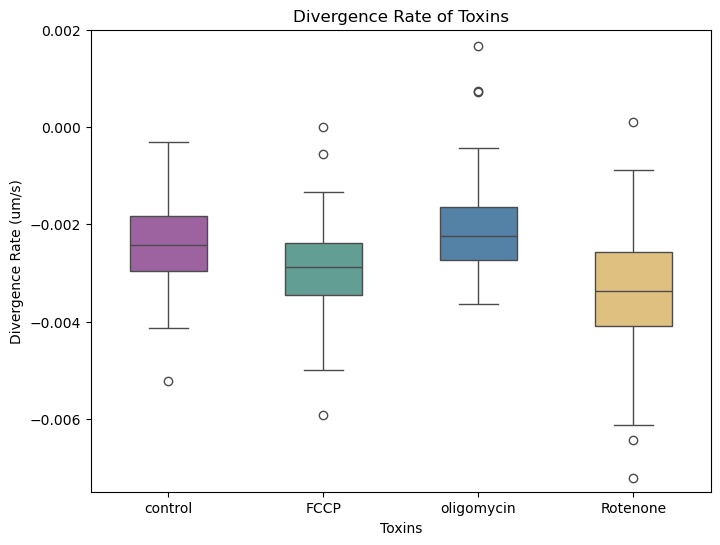

In [ ]:
import seaborn as sns

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

# Define colors for boxes
colors = ['#a559aa', '#59a89c', '#4682b4', '#f0c571']

# Create boxplot with Seaborn
bp = sns.boxplot(x='stream', y='value', data=div_df,  palette=colors, ax=ax, width=0.5)
ax.set(xlabel="Toxins", ylabel="Divergence Rate (um/s)")

# Customize fliers (outliers)
for flier in ax.collections:  # Fliers are stored as PathCollection
    flier.set(marker='D', color='#e7298a', alpha=0.5)

# Set title and axis ticks
plt.title("Divergence Rate of Toxins")
ax.tick_params(axis='x', bottom=True)
ax.tick_params(axis='y', left=True)
plt.ylim(-0.0075, 0.002)

# Show plot
plt.show()

### convegence

In [ ]:
con_df = all_df[['time','convergence_mean', 'stream']]
con_df = pd.melt(con_df, id_vars=['stream'], value_vars=['convergence_mean' ])
con_df = con_df.drop(columns=['variable'])
con_df = con_df.fillna(0)

In [ ]:
# check the distribution of the data
normality = pg.normality(data = con_df, dv = 'value', group = 'stream')
homogeneity = pg.homoscedasticity(data = con_df, dv = 'value', group = 'stream')
print(normality)
print(homogeneity)
print(pg.kruskal(dv = 'value', between = 'stream', data = con_df))

                   W          pval  normal
stream                                    
control     0.983935  1.081248e-01    True
FCCP        0.994506  8.818649e-01    True
oligomycin  0.605219  1.331740e-17   False
Rotenone    0.886395  8.020958e-09   False
               W      pval  equal_var
levene  2.362667  0.070362       True
         Source  ddof1           H         p-unc
Kruskal  stream      3  133.328696  1.036728e-28


In [ ]:
#posthoc pairwise test
print(pg.pairwise_tests(dv = 'value', between = 'stream', data = con_df, parametric=False,padjust='holm', effsize = 'r'))

  Contrast         A           B  Paired  Parametric    U-val alternative  \
0   stream      FCCP    Rotenone   False       False  13836.5   two-sided   
1   stream      FCCP     control   False       False  14016.5   two-sided   
2   stream      FCCP  oligomycin   False       False  16506.5   two-sided   
3   stream  Rotenone     control   False       False   8722.5   two-sided   
4   stream  Rotenone  oligomycin   False       False  12111.5   two-sided   
5   stream   control  oligomycin   False       False  13305.5   two-sided   

          p-unc        p-corr p-adjust         r  
0  1.140895e-11  4.563578e-11     holm  0.097054  
1  1.641667e-12  8.208333e-12     holm  0.111502  
2  1.814402e-27  1.088641e-26     holm  0.076830  
3  3.131502e-01  3.131502e-01     holm  0.152515  
4  3.220592e-05  6.441184e-05     holm  0.047952  
5  2.260976e-09  6.782929e-09     holm  0.181237  


C:\Users\iceji\AppData\Local\Temp\ipykernel_24572\2020727986.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.boxplot(x='stream', y='value', data=con_df,  palette=colors, ax=ax, width=0.5)


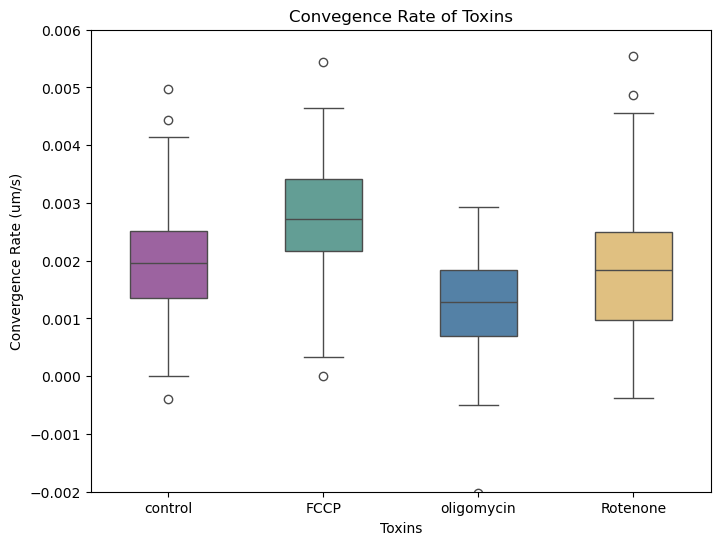

In [ ]:
import seaborn as sns

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

# Define colors for boxes
colors = ['#a559aa', '#59a89c', '#4682b4', '#f0c571']

# Create boxplot with Seaborn
bp = sns.boxplot(x='stream', y='value', data=con_df,  palette=colors, ax=ax, width=0.5)
ax.set(xlabel="Toxins", ylabel="Convergence Rate (um/s)")

# Customize fliers (outliers)
for flier in ax.collections:  # Fliers are stored as PathCollection
    flier.set(marker='D', color='#e7298a', alpha=0.5)

# Set title and axis ticks
plt.title("Convegence Rate of Toxins")
ax.tick_params(axis='x', bottom=True)
ax.tick_params(axis='y', left=True)
plt.ylim(-0.002, 0.006)

# Show plot
plt.show()

In [ ]:
stream_groups = con_df.groupby('stream')['value'].apply(list).tolist()

### aspect ratio

In [56]:
aspect_df = all_df[['t','aspect_ratio_mean', 'stream']]
aspect_df = pd.melt(aspect_df, id_vars=['stream'], value_vars=['aspect_ratio_mean' ])
aspect_df = aspect_df.drop(columns=['variable'])
aspect_df = aspect_df.fillna(0)

In [57]:
# check the distribution of the data
normality = pg.normality(data = aspect_df, dv = 'value', group = 'stream')
homogeneity = pg.homoscedasticity(data = aspect_df, dv = 'value', group = 'stream')
print(normality)
print(homogeneity)
print(pg.kruskal(dv = 'value', between = 'stream', data = aspect_df))

                   W          pval  normal
stream                                    
control     0.971675  5.932902e-03   False
FCCP        0.970837  4.913128e-03   False
oligomycin  0.936646  7.375117e-06   False
Rotenone    0.954378  1.909840e-19   False
                W          pval  equal_var
levene  77.831642  3.905805e-47      False
         Source  ddof1          H         p-unc
Kruskal  stream      3  84.461007  3.387249e-18


In [58]:
#posthoc pairwise test
print(pg.pairwise_tests(dv = 'value', between = 'stream', data = aspect_df, parametric=False,padjust='holm', effsize = 'CLES'))

  Contrast         A           B  Paired  Parametric    U-val alternative  \
0   stream      FCCP    Rotenone   False       False  92784.0   two-sided   
1   stream      FCCP     control   False       False   4470.0   two-sided   
2   stream      FCCP  oligomycin   False       False   6566.0   two-sided   
3   stream  Rotenone     control   False       False  52373.0   two-sided   
4   stream  Rotenone  oligomycin   False       False  65010.0   two-sided   
5   stream   control  oligomycin   False       False  12955.0   two-sided   

          p-unc        p-corr p-adjust      CLES  
0  1.945410e-01  1.945410e-01     holm  0.533692  
1  6.746642e-14  3.373321e-13     holm  0.238159  
2  1.732848e-05  3.465696e-05     holm  0.349832  
3  1.961683e-14  1.177010e-13     holm  0.301249  
4  1.209003e-06  3.627008e-06     holm  0.373937  
5  5.226692e-08  2.090677e-07     holm  0.690234  


In [59]:
print(np.median(aspect_df[aspect_df['stream'] == 'control']['value']))
print(np.median(aspect_df[aspect_df['stream'] == 'FCCP']['value']))
print(np.median(aspect_df[aspect_df['stream'] == 'oligomycin']['value']))
print(np.median(aspect_df[aspect_df['stream'] == 'Rotenone']['value']))


3.122389457366261
2.966056497406281
3.043160662070682
2.951029396951696


C:\Users\iceji\AppData\Local\Temp\ipykernel_31992\2606391414.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.boxplot(x='stream', y='value', data=aspect_df,  palette=colors, ax=ax, width=0.5)


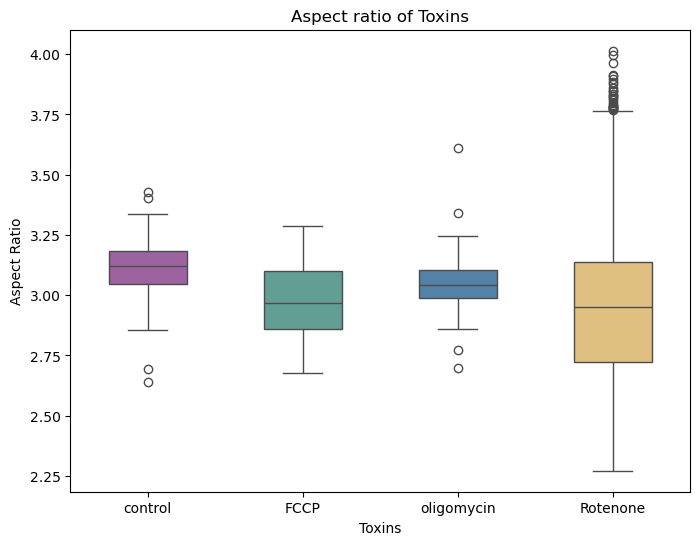

In [60]:
import seaborn as sns

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

# Define colors for boxes
colors = ['#a559aa', '#59a89c', '#4682b4', '#f0c571']

# Create boxplot with Seaborn
bp = sns.boxplot(x='stream', y='value', data=aspect_df,  palette=colors, ax=ax, width=0.5)
ax.set(xlabel="Toxins", ylabel="Aspect Ratio")

# Customize fliers (outliers)
for flier in ax.collections:  # Fliers are stored as PathCollection
    flier.set(marker='D', color='#e7298a', alpha=0.5)

# Set title and axis ticks
plt.title("Aspect ratio of Toxins")
ax.tick_params(axis='x', bottom=True)
ax.tick_params(axis='y', left=True)

# Show plot
plt.show()

C:\Users\iceji\AppData\Local\Temp\ipykernel_31992\2551390594.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  vp = sns.violinplot(


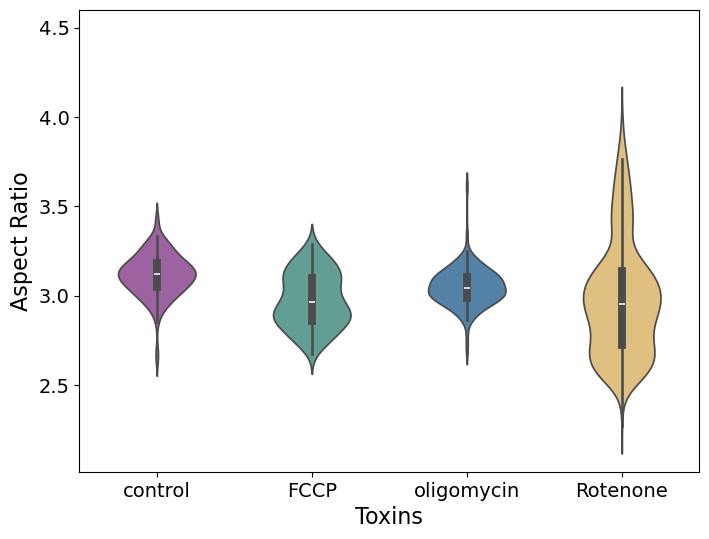

In [70]:
# Define colors for violins
colors = ['#a559aa', '#59a89c', '#4682b4', '#f0c571']

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

# Create violin plot
vp = sns.violinplot(
    x='stream', y='value', data=aspect_df,
    palette=colors, ax=ax, width=0.5, inner='box'
)

# Optionally overlay data points (uncomment if desired)
# sns.swarmplot(x='ff', y='event', data=data, Acolor='#e7298a', ax=ax, alpha=0.5, marker='D')

ax.set_xlabel(xlabel="Toxins", fontsize=16)
ax.set_ylabel( ylabel="Aspect Ratio", fontsize=16)

# Set axis ticks
ax.tick_params(axis='x', bottom=True, labelsize = 14)
ax.tick_params(axis='y', left=True, labelsize = 14)

plt.ylim(top=4.6)
# Show plot
plt.show()

### length

In [61]:
length_df = all_df[['t','length_mean', 'stream']]
length_df = pd.melt(length_df, id_vars=['stream'], value_vars=['length_mean' ])
length_df = length_df.drop(columns=['variable'])
length_df = length_df.fillna(0)

# check the distribution of the data
normality = pg.normality(data = length_df, dv = 'value', group = 'stream')
homogeneity = pg.homoscedasticity(data = length_df, dv = 'value', group = 'stream')
print(normality)
print(homogeneity)
print(pg.kruskal(dv = 'value', between = 'stream', data = length_df))

#posthoc pairwise test
print(pg.pairwise_tests(dv = 'value', between = 'stream', data = length_df, parametric=False,padjust='holm', effsize = 'CLES'))
stream_groups = length_df.groupby('stream')['value'].apply(list).tolist()



                   W          pval  normal
stream                                    
control     0.992156  6.483562e-01    True
FCCP        0.956832  2.633780e-04   False
oligomycin  0.988855  3.403695e-01    True
Rotenone    0.968416  5.175910e-16   False
                 W           pval  equal_var
levene  235.453902  1.819976e-127      False
         Source  ddof1           H         p-unc
Kruskal  stream      3  378.485203  1.011789e-81
  Contrast         A           B  Paired  Parametric     U-val alternative  \
0   stream      FCCP    Rotenone   False       False   19926.0   two-sided   
1   stream      FCCP     control   False       False    1727.0   two-sided   
2   stream      FCCP  oligomycin   False       False      28.0   two-sided   
3   stream  Rotenone     control   False       False  137088.0   two-sided   
4   stream  Rotenone  oligomycin   False       False  116878.0   two-sided   
5   stream   control  oligomycin   False       False     124.0   two-sided   

       

C:\Users\iceji\AppData\Local\Temp\ipykernel_31992\1159031831.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.boxplot(x='stream', y='value', data=length_df,  palette=colors, ax=ax, width=0.5)


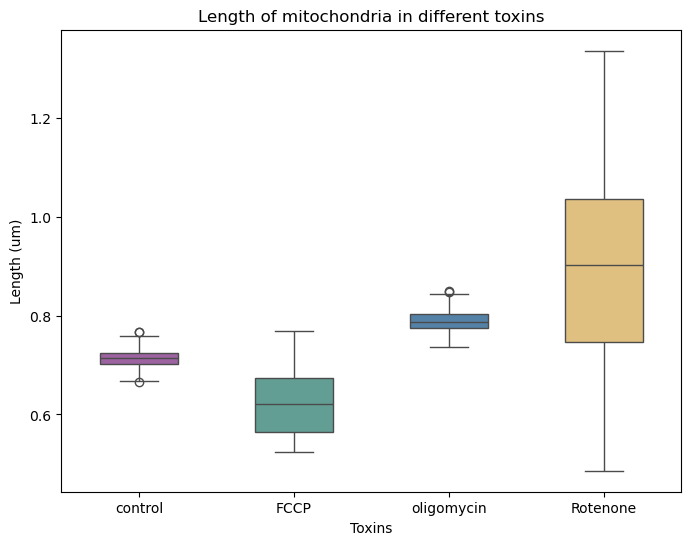

In [62]:
import seaborn as sns

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

# Define colors for boxes
colors = ['#a559aa', '#59a89c', '#4682b4', '#f0c571']

# Create boxplot with Seaborn
bp = sns.boxplot(x='stream', y='value', data=length_df,  palette=colors, ax=ax, width=0.5)
ax.set(xlabel="Toxins", ylabel="Length (um)")

# Customize fliers (outliers)
for flier in ax.collections:  # Fliers are stored as PathCollection
    flier.set(marker='D', color='#e7298a', alpha=0.5)

# Set title and axis ticks
plt.title("Length of mitochondria in different toxins")
ax.tick_params(axis='x', bottom=True)
ax.tick_params(axis='y', left=True)

# Show plot
plt.show()

### velocity1

In [65]:
vel_df = all_df[['t','velocity', 'stream']]
vel_df = pd.melt(vel_df, id_vars=['stream'], value_vars=['velocity' ])
vel_df = vel_df.drop(columns=['variable'])
vel_df = vel_df.fillna(0)

# check the distribution of the data
normality = pg.normality(data = vel_df, dv = 'value', group = 'stream')
homogeneity = pg.homoscedasticity(data = vel_df, dv = 'value', group = 'stream')
print(normality)
print(homogeneity)
print(pg.kruskal(dv = 'value', between = 'stream', data = vel_df))

#posthoc pairwise test
print(pg.pairwise_tests(dv = 'value', between = 'stream', data = vel_df, parametric=False,padjust='holm', effsize = 'CLES'))
stream_groups = vel_df.groupby('stream')['value'].apply(list).tolist()



                   W          pval  normal
stream                                    
control     0.990579  4.870383e-01    True
FCCP        0.990455  4.753151e-01    True
oligomycin  0.994015  8.392417e-01    True
Rotenone    0.789361  1.257778e-37   False
                W          pval  equal_var
levene  95.916688  2.717153e-57      False
         Source  ddof1           H          p-unc
Kruskal  stream      3  653.412563  2.651317e-141
  Contrast         A           B  Paired  Parametric     U-val alternative  \
0   stream      FCCP    Rotenone   False       False   14441.5   two-sided   
1   stream      FCCP     control   False       False    9689.0   two-sided   
2   stream      FCCP  oligomycin   False       False   11293.0   two-sided   
3   stream  Rotenone     control   False       False  159340.0   two-sided   
4   stream  Rotenone  oligomycin   False       False  160373.0   two-sided   
5   stream   control  oligomycin   False       False   11164.0   two-sided   

         

C:\Users\iceji\AppData\Local\Temp\ipykernel_31992\2628035703.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.boxplot(x='stream', y='value', data=vel_df,  palette=colors, ax=ax, width=0.5)


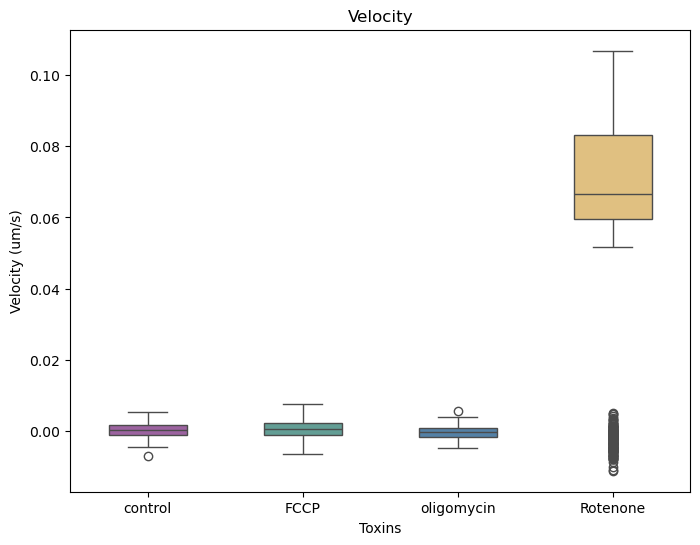

In [66]:
import seaborn as sns

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

# Define colors for boxes
colors = ['#a559aa', '#59a89c', '#4682b4', '#f0c571']

# Create boxplot with Seaborn
bp = sns.boxplot(x='stream', y='value', data=vel_df,  palette=colors, ax=ax, width=0.5)
ax.set(xlabel="Toxins", ylabel="Velocity (um/s)")

# Customize fliers (outliers)
for flier in ax.collections:  # Fliers are stored as PathCollection
    flier.set(marker='D', color='#e7298a', alpha=0.5)

# Set title and axis ticks
plt.title("Velocity")
ax.tick_params(axis='x', bottom=True)
ax.tick_params(axis='y', left=True)

# Show plot
plt.show()

### velocity2

In [ ]:
vel2_df = all_df[['time','lin_vel_mean_1', 'stream']]
vel2_df = pd.melt(vel2_df, id_vars=['stream'], value_vars=['lin_vel_mean_1' ])
vel2_df = vel2_df.drop(columns=['variable'])
vel2_df = vel2_df.fillna(0)

# check the distribution of the data
normality = pg.normality(data = vel2_df, dv = 'value', group = 'stream')
homogeneity = pg.homoscedasticity(data = vel2_df, dv = 'value', group = 'stream')
print(normality)
print(homogeneity)
print(pg.kruskal(dv = 'value', between = 'stream', data = vel2_df))

#posthoc pairwise test
print(pg.pairwise_tests(dv = 'value', between = 'stream', data = vel2_df, parametric=False,padjust='holm', effsize = 'CLES'))
stream_groups = vel2_df.groupby('stream')['value'].apply(list).tolist()

print(np.median(np.array(stream_groups[0])))
print(np.median(np.array(stream_groups[1])))
print(np.median(np.array(stream_groups[2])))
print(np.median(np.array(stream_groups[3])))

                   W      pval  normal
stream                                
control     0.990579  0.487038    True
FCCP        0.990455  0.475315    True
oligomycin  0.994015  0.839242    True
Rotenone    0.993858  0.824526    True
                W          pval  equal_var
levene  15.607628  9.447441e-10      False
         Source  ddof1          H         p-unc
Kruskal  stream      3  76.016189  2.194279e-16
  Contrast         A           B  Paired  Parametric    U-val alternative  \
0   stream      FCCP    Rotenone   False       False  14034.0   two-sided   
1   stream      FCCP     control   False       False   9689.0   two-sided   
2   stream      FCCP  oligomycin   False       False  11293.0   two-sided   
3   stream  Rotenone     control   False       False   4626.0   two-sided   
4   stream  Rotenone  oligomycin   False       False   5559.0   two-sided   
5   stream   control  oligomycin   False       False  11164.0   two-sided   

          p-unc        p-corr p-adjust      

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot(stream_groups, patch_artist = True,labels=[ 'control', 'FCCP', 'oligomycin', 'Rotenone'])

colors = ['#a559aa', '#59a89c', '#082a54', '#f0c571']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# changing color and linewidth of
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

for median in bp['medians']:
    median.set(color ='red',
               linewidth = 1)

# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)

#ax.set_yticklabels(['d_1', 'd_2', 
#                    'd_3', 'd_4'])
# 
plt.title("Customized box plot")

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.show()### convegence


C:\Users\iceji\AppData\Local\Temp\ipykernel_9328\1585888090.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(stream_groups, patch_artist = True,labels=[ 'control', 'FCCP', 'oligomycin', 'Rotenone'])


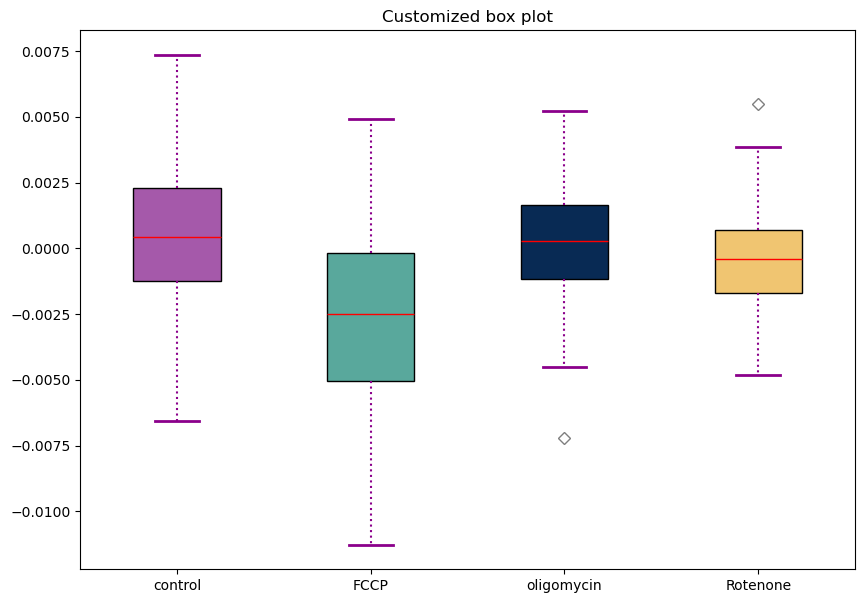

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot(stream_groups, patch_artist = True,labels=[ 'control', 'FCCP', 'oligomycin', 'Rotenone'])

colors = ['#a559aa', '#59a89c', '#082a54', '#f0c571']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# changing color and linewidth of
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

for median in bp['medians']:
    median.set(color ='red',
               linewidth = 1)

# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)

#ax.set_yticklabels(['d_1', 'd_2', 
#                    'd_3', 'd_4'])
# 
plt.title("Customized box plot")

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.show()### convegence


## chart

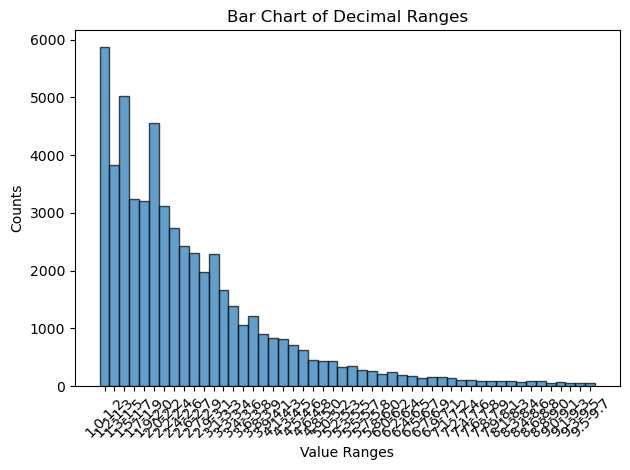

In [5]:
counts, bins = np.histogram(ar["aspect_ratio_mean"], bins=50)  # Create 10 bins for the range 0-1

# Bin centers (for bar positioning)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Plotting
plt.bar(bin_centers, counts, width=(bins[1] - bins[0 ]), edgecolor='black', alpha=0.7)
plt.xlabel('Value Ranges')
plt.ylabel('Counts')
plt.title('Bar Chart of Decimal Ranges')
plt.xticks(bin_centers, labels=[f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(len(bins)-1)], rotation=45)

plt.tight_layout()
plt.show()

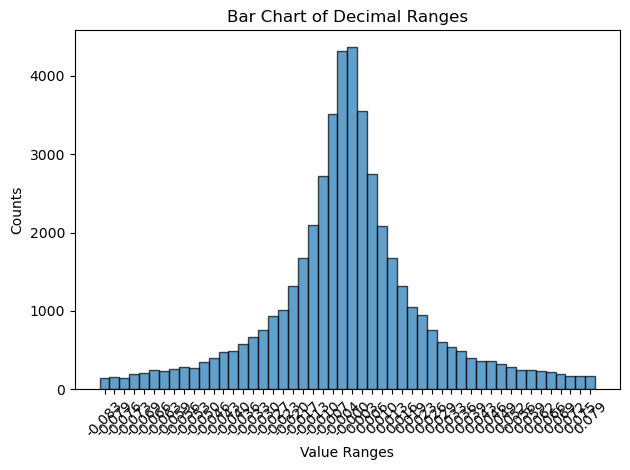

In [6]:
counts, bins = np.histogram(div["vergere_mean"], bins=50)  # Create 10 bins for the range 0-1

# + flow in 
#  - flow out

# Bin centers (for bar positioning)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Plotting
plt.bar(bin_centers, counts, width=(bins[1] - bins[0 ]), edgecolor='black', alpha=0.7)
plt.xlabel('Value Ranges')
plt.ylabel('Counts')
plt.title('Bar Chart of Decimal Ranges')
plt.xticks(bin_centers, labels=[f'{bins[i]:.3f}' for i in range(len(bins)-1)], rotation=45)

plt.tight_layout()
plt.show()

## mdivi

In [7]:
main_dir = "D:/Internship/NTU/nellie_output/nellie_output/mdivi/"

file_path_feature = main_dir + "ins1_" + 'mdivi_3' + ".ome-ch0-features_components.csv"
#file_path_feature = main_dir + "/" + im_frame + "_resized_" + im_concen + "_glu_1min_#1.ome-ch0-features_components.csv"
#file_path_feature = main_dir + "time_ins_" +"FCCP" + ".ome-ch0-features_components.csv"
df = pd.read_csv(file_path_feature)
mini_df = df[['t', 'reassigned_label_raw', 'area_raw' , 'solidity_raw', 'aspect_ratio_mean', 'vergere_mean'] ]
mini_df.head()

,t,reassigned_label_raw,area_raw,solidity_raw,aspect_ratio_mean,vergere_mean
0,0.0,1.0,28.282472,0.606164,2.598591,NaN
1,0.0,2.0,0.022220,1.000000,1.044815,NaN
2,0.0,3.0,0.019045,1.000000,1.000000,NaN
3,0.0,4.0,12.014496,0.461698,2.515644,NaN
4,0.0,5.0,0.044439,1.000000,2.500000,NaN


In [8]:
print(np.min(mini_df["aspect_ratio_mean"]) , np.max(mini_df["aspect_ratio_mean"]))
mean_ar = np.mean(mini_df["aspect_ratio_mean"]) 
std_ar = np.std(mini_df["aspect_ratio_mean"])

mean_div = np.mean(mini_df["vergere_mean"]) 
std_div = np.std(mini_df["vergere_mean"])

upper_bound_ar = mean_ar + 3*std_ar
upper_bound_div = mean_div + 1*std_div
lower_bound_div = mean_div - 1*std_div

mask_ar = np.array(mini_df["aspect_ratio_mean"])
mask_div = np.array(mini_df["vergere_mean"])
 
ar = mini_df[mask_ar < upper_bound_ar]
div = mini_df[mask_div < upper_bound_div]
div = div[div['vergere_mean'] > lower_bound_div]

print(upper_bound_div,lower_bound_div,mean_div)
y = pg.normality(data = div, dv = 'vergere_mean', group = 'reassigned_label_raw')
y = x[x['normal'] == True]
y

1.0 60.76345596729068
0.08932099050126499 -0.08943781620705737 -5.8412852896187265e-05


c:\Users\iceji\.conda\envs\napari-env\lib\site-packages\pingouin\distribution.py:242: UserWarning: Group 11.0 has less than 4 valid samples. Returning NaN.
  warnings.warn(f"Group {idx} has less than 4 valid samples. Returning NaN.")
c:\Users\iceji\.conda\envs\napari-env\lib\site-packages\pingouin\distribution.py:242: UserWarning: Group 17.0 has less than 4 valid samples. Returning NaN.
  warnings.warn(f"Group {idx} has less than 4 valid samples. Returning NaN.")
c:\Users\iceji\.conda\envs\napari-env\lib\site-packages\pingouin\distribution.py:242: UserWarning: Group 27.0 has less than 4 valid samples. Returning NaN.
  warnings.warn(f"Group {idx} has less than 4 valid samples. Returning NaN.")
c:\Users\iceji\.conda\envs\napari-env\lib\site-packages\pingouin\distribution.py:242: UserWarning: Group 26.0 has less than 4 valid samples. Returning NaN.
  warnings.warn(f"Group {idx} has less than 4 valid samples. Returning NaN.")
c:\Users\iceji\.conda\envs\napari-env\lib\site-packages\pingouin

,W,pval,normal
reassigned_label_raw,,,
1.0,0.981923,0.057655,True
3.0,0.969436,0.069803,True
9.0,0.989905,0.229945,True
12.0,0.961832,0.790433,True
13.0,0.850398,0.096156,True
...,...,...,...
235.0,0.988820,0.666702,True
283.0,0.833777,0.064974,True
226.0,0.974555,0.597310,True


# Area


## function

In [12]:
def apply_function_to_arrays(arrays, func, *args):
    '''
def apply_function_to_arrays(arrays, func, *args):
    return np.array([func(arr, *args) for arr in arrays])'''
    # Apply func to each array; capture results as a list of tuples (if multiple outputs)
    results = [func(arr, *args) for arr in arrays]
    
    # Check if the first result is a tuple (i.e., func returns multiple outputs)
    if isinstance(results[0], tuple):
        # Transpose the results to group each output type
        transposed_results = list(zip(*results))
        # Convert each group to a numpy array
        return tuple(np.array(group) for group in transposed_results)
    else:
        # Single output: return a single numpy array
        return np.array(results)

In [73]:
def plot_multiple_line(x, y, names, title="Multiple ROC Curves"):
    # If x and y are 1D, make them 2D lists
    if isinstance(x, np.ndarray) and x.ndim == 1:
        x = [x]
    if isinstance(y, np.ndarray) and y.ndim == 1:
        y = [y]
    if isinstance(names, str):
        names = [names]
    
    # (If you want to handle lists as well)
    if not isinstance(x[0], (np.ndarray, list)):
        x = [x]
    if not isinstance(y[0], (np.ndarray, list)):
        y = [y]
    if not isinstance(names, (list, tuple)):
        names = [names]
    
    colors = plt.cm.rainbow(np.linspace(0, 1, len(names)))
    plt.figure(figsize=(12, 8))

    for i, (fpr, tpr, name, color) in enumerate(zip(x, y, names, colors)):
        plt.plot(fpr, tpr, color=color, alpha=0.9, label=f'{name} (Line)', zorder=1)
        plt.scatter(fpr, tpr, color=color, s=40, alpha=0.5, zorder=2)
        
    plt.grid(True, alpha=0.3)
    plt.xlabel('Frame' , fontsize = 14)
    plt.ylabel('Area / Segmented component', fontsize= 14)
    plt.tick_params(axis='x', labelsize=14)  # Increase font size for x-axis ticks
    plt.tick_params(axis='y', labelsize=14)
    plt.title(title)
    plt.legend()
    plt.show()

In [14]:
def plot_multiple_line(x, y, names, title="Multiple ROC Curves"):

    colors = plt.cm.rainbow(np.linspace(0, 1, len(names)))
    plt.figure(figsize=(12, 8))


    for i, (fpr, tpr, name, color) in enumerate(zip(x, y, names, colors)):
        plt.plot(fpr, tpr, color=color, alpha=0.9, label=f'{name} (Line)', zorder=1)
        plt.scatter(fpr, tpr, color=color, s=40, alpha=0.5, zorder=2)

    handles, labels = plt.gca().get_legend_handles_labels()
    unique_labels = []
    unique_handles = []
    seen_names = set()
    
    for handle, label in zip(handles, labels):
        name = label.split(' (')[0]
        if name not in seen_names:
            seen_names.add(name)
            unique_labels.append(name)
            unique_handles.append(handle)
    
    plt.legend(unique_handles, unique_labels, loc='upper right')
        
    plt.grid(True, alpha=0.3)
    plt.xlabel('Number of frame')
    plt.ylabel('number of event')
    plt.title(title)

In [15]:
def get_label_info(path,name):
    df = pd.read_csv(path)
    mini_df = df[['t', 'label', 'area_raw' , 'solidity_raw', 'aspect_ratio_mean', 'divergence_mean' , 'convergence_mean', 'reassigned_label_raw'] ]

    frames = np.unique(mini_df['t'])
    label_num_all = []
    area_all = []
    raw_label_all = []
    frame_all = []
    for frame in frames:
        mini_df_frame = mini_df[mini_df['t'] == frame]
        label_num = len(np.unique(mini_df_frame['reassigned_label_raw']))
        area = np.sum(mini_df_frame['area_raw']) # can also do average area
        raw_label = len(np.unique(mini_df_frame['label']))

        label_num_all.append(label_num)
        area_all.append(area)
        raw_label_all.append(raw_label) 
        frame_all.append(frame)

    return np.array(label_num_all), np.array(area_all), np.array(raw_label_all), np.array(frame_all)

In [16]:
def correct_anomalies(data):
    corrected = data.copy()
    rep = np.mean(data)
    sd = np.std(data)
    threshold = 3  * sd  
    for i in range(len(data)):
        if np.abs(data[i]-rep) > threshold:
            corrected[i] = rep
        else:
            corrected[i] = data[i]
    
    return corrected

## import toxins file

In [17]:
# check number of label over time/frame 
# check area over time/frame
#stream_frame = ['1','1','1','1','5','5','10','10']
#stream_con = ['0','0.5','1','2','1','0.5','0','2']
stream_file = ['control','FCCP','oligomycin','Rotenone']

main_dir = "D:/Internship/NTU/nellie_output/nellie_output/toxins/"
label_num_all = []
area_all = []
raw_label_all = []
frame_all = []

for s in range(len(stream_file)):
    # 1st part check area and number of label
    #im_concen = stream_con[s]
    im_concen = stream_file[s]

    #file_path_feature = main_dir + "ins1_" + im_concen + ".ome-ch0-features_components.csv"
    #file_path_feature = main_dir + "/" + im_frame + "_resized_" + im_concen + "_glu_1min_#1.ome-ch0-features_components.csv"
    file_path_feature = main_dir + "time_ins_" + im_concen + ".ome-ch0-features_components.csv"
    label_num, area, raw_label, frame = get_label_info(file_path_feature, im_concen)
    if len(label_num_all) == 0:
        label_num_all = [label_num]
        area_all = [area]
        raw_label_all = [raw_label]
        frame_all = [frame]

    else:
        label_num_all.append(label_num)
        area_all.append(area)
        raw_label_all.append(raw_label)
        frame_all.append(frame)

In [18]:
min = np.inf
for x in label_num_all:
    tmp = len(x)
    if tmp < min:
        min = tmp

label_num_all = np.array([np.array(x[:min]) for x in label_num_all])
area_all = np.array([np.array(x[:min]) for x in area_all])
raw_label_all = np.array([np.array(x[:min]) for x in raw_label_all])
frame_all = np.array([np.array(x[:min]) for x in frame_all])

corrected_area = apply_function_to_arrays(area_all,correct_anomalies)

## import mdivi file

In [19]:
label_num_mdivi = []
area_mdivi = []
raw_label_mdivi = []
frame_mdivi = []
main_dir = "D:/Internship/NTU/nellie_output/nellie_output/mdivi/"
stream_file_mdivi = ['control_3','control_10min','mdivi_3','mdivi_10min']

for s in range(len(stream_file_mdivi)):
    im_concen = stream_file_mdivi[s]

    file_path_feature = main_dir + "ins1_" + im_concen + ".ome-ch0-features_components.csv"
    #file_path_feature = main_dir + "/" + im_frame + "_resized_" + im_concen + "_glu_1min_#1.ome-ch0-features_components.csv"
    #file_path_feature = main_dir + "time_ins_" + im_concen + ".ome-ch0-features_components.csv"
    label_num, area, raw_label, frame = get_label_info(file_path_feature, im_concen)
    if len(label_num_all) == 0:
        label_num_mdivi = [label_num]
        area_mdivi = [area]
        raw_label_mdivi = [raw_label]
        frame_mdivi = [frame]

    else:
        label_num_mdivi.append(label_num)
        area_mdivi.append(area)
        raw_label_mdivi.append(raw_label)
        frame_mdivi.append(frame)

In [20]:
min_MDIVI = np.inf
for x in label_num_mdivi:
    tmp = len(x)
    if tmp < min:
        min_MDIVI = tmp

label_num_mdivi = np.array([np.array(x[:min]) for x in label_num_mdivi])
area_mdivi = np.array([np.array(x[:min]) for x in area_mdivi])
raw_label_mdivi = np.array([np.array(x[:min]) for x in raw_label_mdivi])
frame_mdivi = np.array([np.array(x[:min]) for x in frame_mdivi])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

## start analysis


In [21]:
#consecutive number of label  diff
diff_arr = apply_function_to_arrays(raw_label_all, np.diff)
diff_arr = np.array([np.insert(x, 0, 0) for x in diff_arr])  
culmulative_diff = np.cumsum(diff_arr, axis=1)
#average compoenent change by total reassigned label each frame
avg_label_diff = diff_arr/label_num_all
# number of label diff compare with initial timepoinmt

diff_area = apply_function_to_arrays(corrected_area, np.diff)
diff_area = np.array([np.insert(x, 0, 0) for x in diff_area])  
culmulative_diff_area = np.cumsum(diff_area, axis=1)

area_per_rawLabel = (corrected_area / raw_label_all)


### label change between frame

In [22]:
culmulative_diff_pd = pd.DataFrame(np.transpose(culmulative_diff), columns=['control', 'FCCP', 'oligomycin', 'Rotenone'])
culmulative_diff_pd = culmulative_diff_pd.melt(var_name='toxin', value_name='number_of_label_change')
culmulative_diff_pd

,toxin,number_of_label_change
0,control,0
1,control,4
2,control,24
3,control,-3
4,control,32
...,...,...
543,Rotenone,46
544,Rotenone,37
545,Rotenone,72
546,Rotenone,33


In [23]:
normality = pg.normality(data = culmulative_diff_pd, dv = 'number_of_label_change', group = 'toxin')
homogeneity = pg.homoscedasticity(data = culmulative_diff_pd, dv = 'number_of_label_change', group = 'toxin')
print(normality)
print(homogeneity)

print("fission") # shows all of then are significantly different 
#check the influence and correlation with Rank Biserial Correlation
print(pg.pairwise_tests(dv = 'number_of_label_change', between =  'toxin', data = culmulative_diff_pd, parametric=False,padjust='holm', effsize = 'r'))

                   W          pval  normal
toxin                                     
control     0.991000  5.282220e-01    True
FCCP        0.911415  1.802202e-07   False
oligomycin  0.985049  1.413159e-01    True
Rotenone    0.879781  3.786260e-09   False
               W      pval  equal_var
levene  4.511092  0.003883      False
fission
  Contrast         A           B  Paired  Parametric    U-val alternative  \
0    toxin      FCCP    Rotenone   False       False  14284.5   two-sided   
1    toxin      FCCP     control   False       False  17016.0   two-sided   
2    toxin      FCCP  oligomycin   False       False  14388.0   two-sided   
3    toxin  Rotenone     control   False       False  14218.0   two-sided   
4    toxin  Rotenone  oligomycin   False       False   9375.5   two-sided   
5    toxin   control  oligomycin   False       False   4598.5   two-sided   

          p-unc        p-corr p-adjust         r  
0  7.919065e-14  3.167626e-13     holm  0.397382  
1  2.688889e-31 

C:\Users\iceji\AppData\Local\Temp\ipykernel_31992\1574063046.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.boxplot(x='toxin', y='number_of_label_change', data=culmulative_diff_pd,  palette=colors, ax=ax, width=0.5)


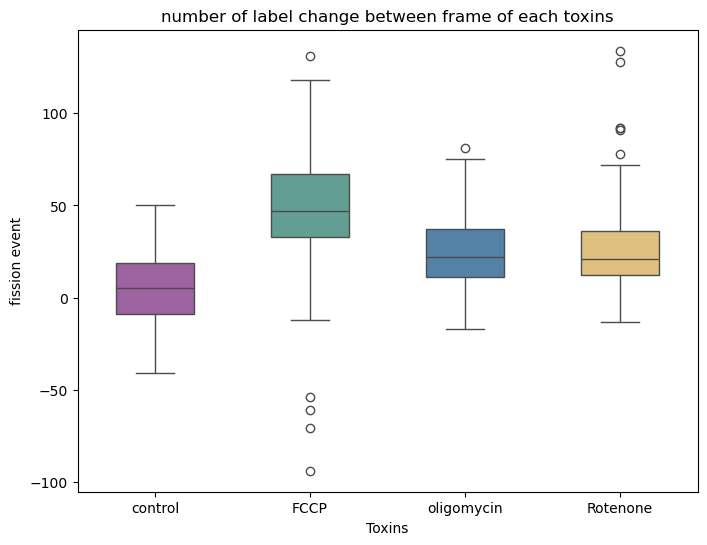

In [24]:
import seaborn as sns

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

# Define colors for boxes
colors = ['#a559aa', '#59a89c', '#4682b4', '#f0c571']

# Create boxplot with Seaborn
bp = sns.boxplot(x='toxin', y='number_of_label_change', data=culmulative_diff_pd,  palette=colors, ax=ax, width=0.5)
ax.set(xlabel="Toxins", ylabel="fission event")

# Customize fliers (outliers)
for flier in ax.collections:  # Fliers are stored as PathCollection
    flier.set(marker='D', color='#e7298a', alpha=0.5)

# Set title and axis ticks
plt.title("number of label change between frame of each toxins")
ax.tick_params(axis='x', bottom=True)
ax.tick_params(axis='y', left=True)

# Show plot
plt.show()

C:\Users\iceji\AppData\Local\Temp\ipykernel_31992\1099047285.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  vp = sns.violinplot(


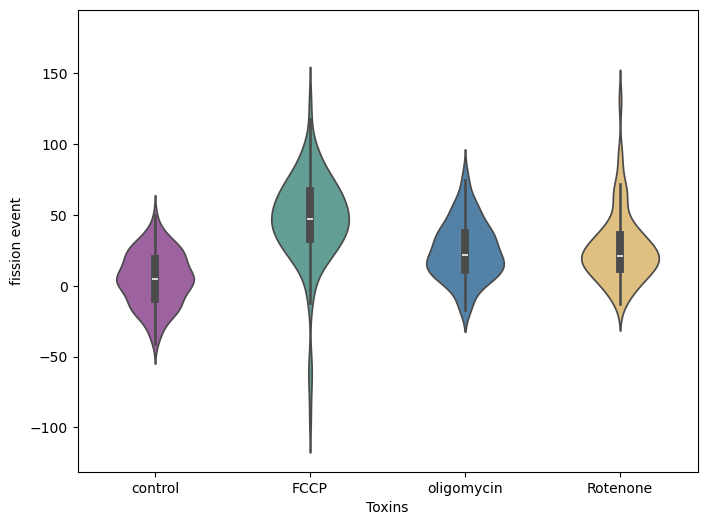

In [30]:
# Define colors for violins
colors = ['#a559aa', '#59a89c', '#4682b4', '#f0c571']

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

# Create violin plot
vp = sns.violinplot(
    x='toxin', y='number_of_label_change', data=culmulative_diff_pd,
    palette=colors, ax=ax, width=0.5, inner='box'
)

# Optionally overlay data points (uncomment if desired)
# sns.swarmplot(x='ff', y='event', data=data, Acolor='#e7298a', ax=ax, alpha=0.5, marker='D')

ax.set(xlabel="Toxins", ylabel="fission event")

# Set axis ticks
ax.tick_params(axis='x', bottom=True)
ax.tick_params(axis='y', left=True)

plt.ylim(top=195)
# Show plot
plt.show()

In [25]:
culmulative_diff_pd

,toxin,number_of_label_change
0,control,0
1,control,4
2,control,24
3,control,-3
4,control,32
...,...,...
543,Rotenone,46
544,Rotenone,37
545,Rotenone,72
546,Rotenone,33


In [26]:
from scipy.stats import linregress
culmulative_diff_pd['frame'] = list(range(137)) * 4
slopes = {}
for condition in culmulative_diff_pd['toxin'].unique():
    subset = culmulative_diff_pd[culmulative_diff_pd['toxin'] == condition]
    slope, intercept, r_value, p_value, std_err = linregress(subset['frame'], subset['event'])
    slopes[condition] = slope

KeyError: 'event'

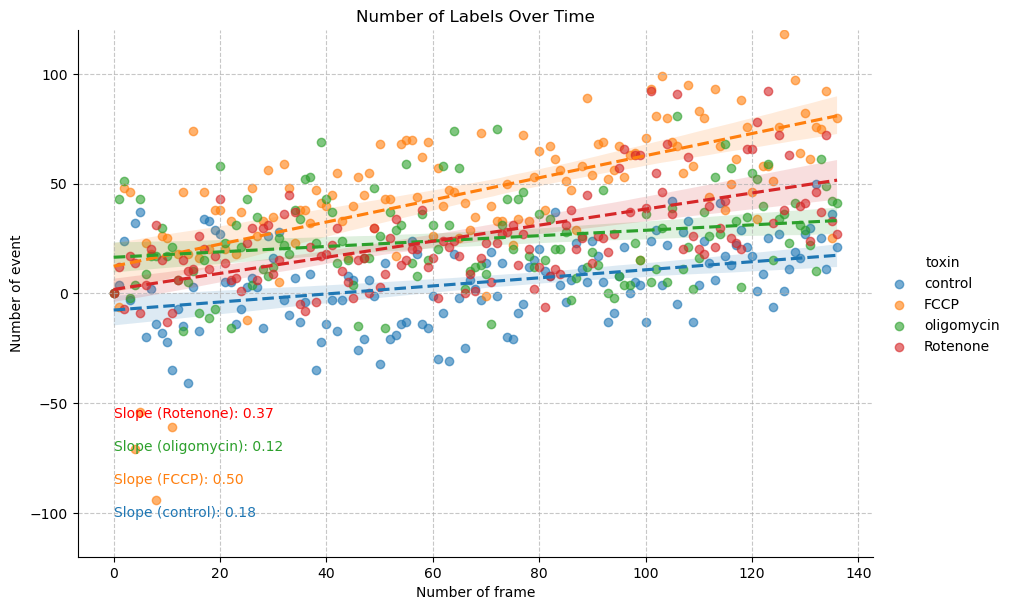

In [ ]:
sns.lmplot(data=culmulative_diff_pd, x='frame', y='event', hue='toxin', height=6, aspect=1.5,
           scatter_kws={'alpha': 0.6}, line_kws={'linestyle': '--'})
plt.title('Number of Labels Over Time')
plt.xlabel('Number of frame')
plt.ylabel('Number of event')
plt.ylim(-120, 120)  # Adjust based on your data range
plt.grid(True, linestyle='--', alpha=0.7)

i = -100
for condition, slope in slopes.items():
    plt.text(0, i, 
             f'Slope ({condition}): {slope:.2f}', 
             color=plt.gca().lines[0].get_color() if condition == 'control' else 
                   plt.gca().lines[1].get_color() if condition == 'FCCP' else 
                   plt.gca().lines[2].get_color() if condition == 'oligomycin' else 'red',
             ha='left', va='center')
    i +=15

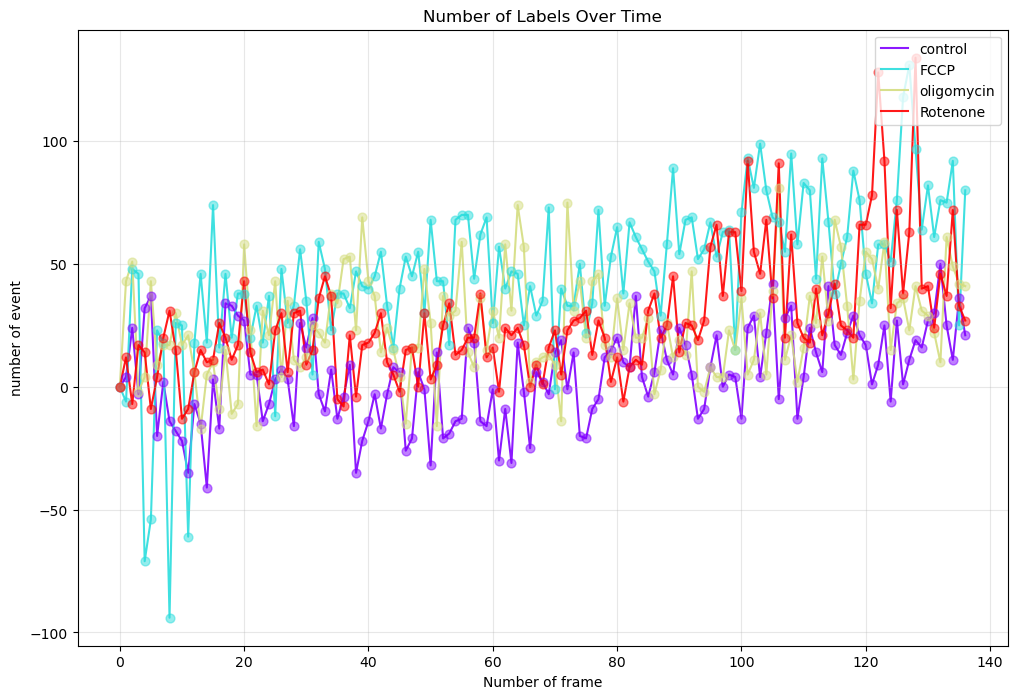

In [ ]:

plot_multiple_line(
    frame_all, 
    culmulative_diff, 
    stream_file, 
    title="Number of Labels Over Time"
)

### area change between each frame

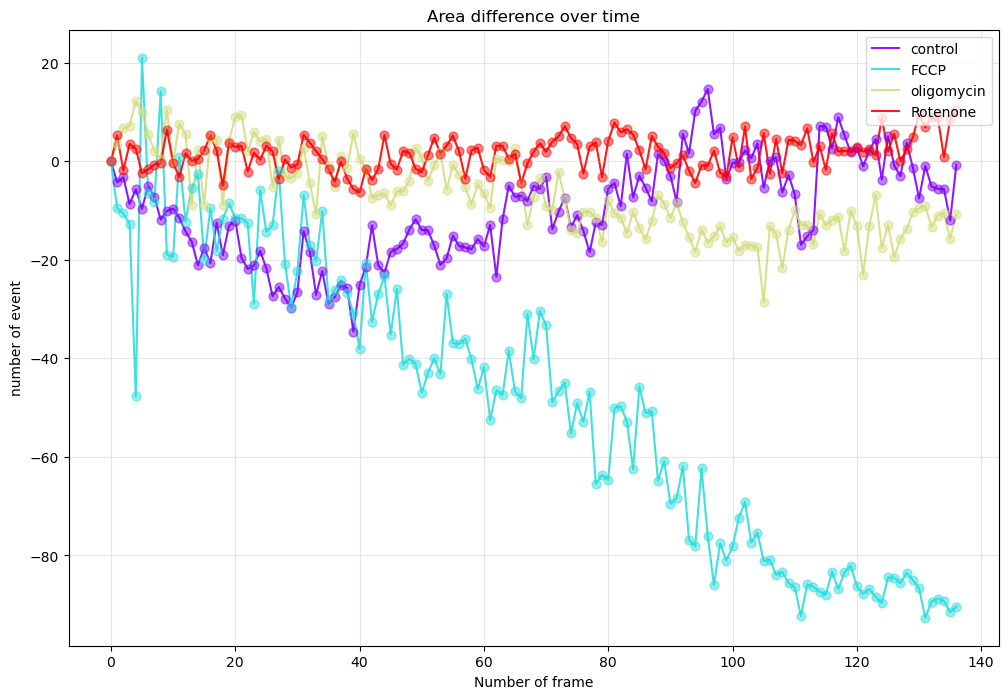

In [ ]:

plot_multiple_line(
    frame_all, 
    culmulative_diff_area, 
    stream_file, 
    title="Area difference over time"
)

In [ ]:
culmulative_diff_area_pd = pd.DataFrame(np.transpose(culmulative_diff_area), columns=['control', 'FCCP', 'oligomycin', 'Rotenone'])
culmulative_diff_area_pd = culmulative_diff_area_pd.melt(var_name='toxin', value_name='event')
normality = pg.normality(data = culmulative_diff_area_pd, dv = 'event', group = 'toxin')
homogeneity = pg.homoscedasticity(data = culmulative_diff_area_pd, dv = 'event', group = 'toxin')
print(normality)
print(homogeneity)

print("fission") # shows all of then are significantly different 
#check the influence and correlation with Rank Biserial Correlation
print(pg.pairwise_tests(dv = 'event', between =  'toxin', data = culmulative_diff_area_pd, parametric=False,padjust='holm', effsize = 'r'))

                   W      pval  normal
toxin                                 
control     0.991550  0.584363    True
FCCP        0.939944  0.000013   False
oligomycin  0.976447  0.017873   False
Rotenone    0.989304  0.374940    True
                 W          pval  equal_var
levene  178.339001  1.652038e-80      False
fission
  Contrast         A           B  Paired  Parametric    U-val alternative  \
0    toxin      FCCP    Rotenone   False       False    419.5   two-sided   
1    toxin      FCCP     control   False       False   2199.5   two-sided   
2    toxin      FCCP  oligomycin   False       False   1707.5   two-sided   
3    toxin  Rotenone     control   False       False  15819.0   two-sided   
4    toxin  Rotenone  oligomycin   False       False  15031.5   two-sided   
5    toxin   control  oligomycin   False       False   7864.5   two-sided   

          p-unc        p-corr p-adjust         r  
0  1.559782e-42  9.358690e-42     holm -0.285143  
1  6.309000e-28  2.523600e-2

C:\Users\iceji\AppData\Local\Temp\ipykernel_12108\1107427674.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.boxplot(x='toxin', y='event', data=culmulative_diff_area_pd,  palette=colors, ax=ax, width=0.5)


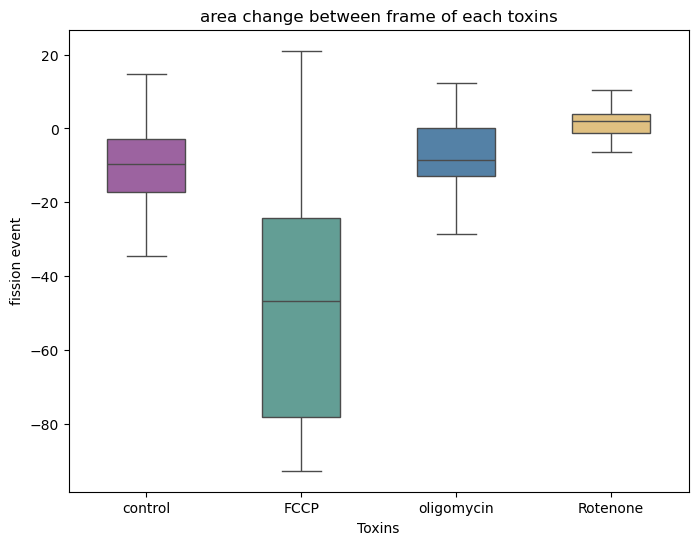

In [ ]:
import seaborn as sns

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

# Define colors for boxes
colors = ['#a559aa', '#59a89c', '#4682b4', '#f0c571']

# Create boxplot with Seaborn
bp = sns.boxplot(x='toxin', y='event', data=culmulative_diff_area_pd,  palette=colors, ax=ax, width=0.5)
ax.set(xlabel="Toxins", ylabel="fission event")

# Customize fliers (outliers)
for flier in ax.collections:  # Fliers are stored as PathCollection
    flier.set(marker='D', color='#e7298a', alpha=0.5)

# Set title and axis ticks
plt.title("area change between frame of each toxins")
ax.tick_params(axis='x', bottom=True)
ax.tick_params(axis='y', left=True)

# Show plot
plt.show()

In [ ]:
from scipy.stats import linregress
culmulative_diff_area_pd['frame'] = list(range(137)) * 4
slopes = {}
for condition in culmulative_diff_area_pd['toxin'].unique():
    subset = culmulative_diff_area_pd[culmulative_diff_area_pd['toxin'] == condition]
    slope, intercept, r_value, p_value, std_err = linregress(subset['frame'], subset['event'])
    slopes[condition] = slope

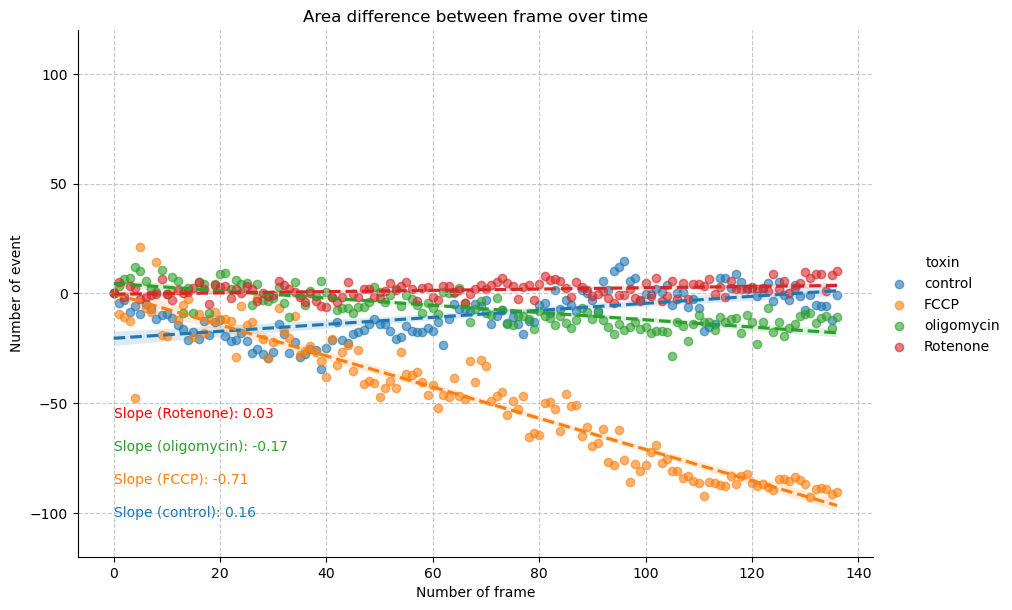

In [ ]:
sns.lmplot(data=culmulative_diff_area_pd, x='frame', y='event', hue='toxin', height=6, aspect=1.5,
           scatter_kws={'alpha': 0.6}, line_kws={'linestyle': '--'})
plt.title('Area difference between frame over time')
plt.xlabel('Number of frame')
plt.ylabel('Number of event')
plt.ylim(-120, 120)  # Adjust based on your data range
plt.grid(True, linestyle='--', alpha=0.7)

i = -100
for condition, slope in slopes.items():
    plt.text(0, i, 
             f'Slope ({condition}): {slope:.2f}', 
             color=plt.gca().lines[0].get_color() if condition == 'control' else 
                   plt.gca().lines[1].get_color() if condition == 'FCCP' else 
                   plt.gca().lines[2].get_color() if condition == 'oligomycin' else 'red',
             ha='left', va='center')
    i +=15

### area change per label

In [ ]:
area_per_rawLabel = (corrected_area / raw_label_all)

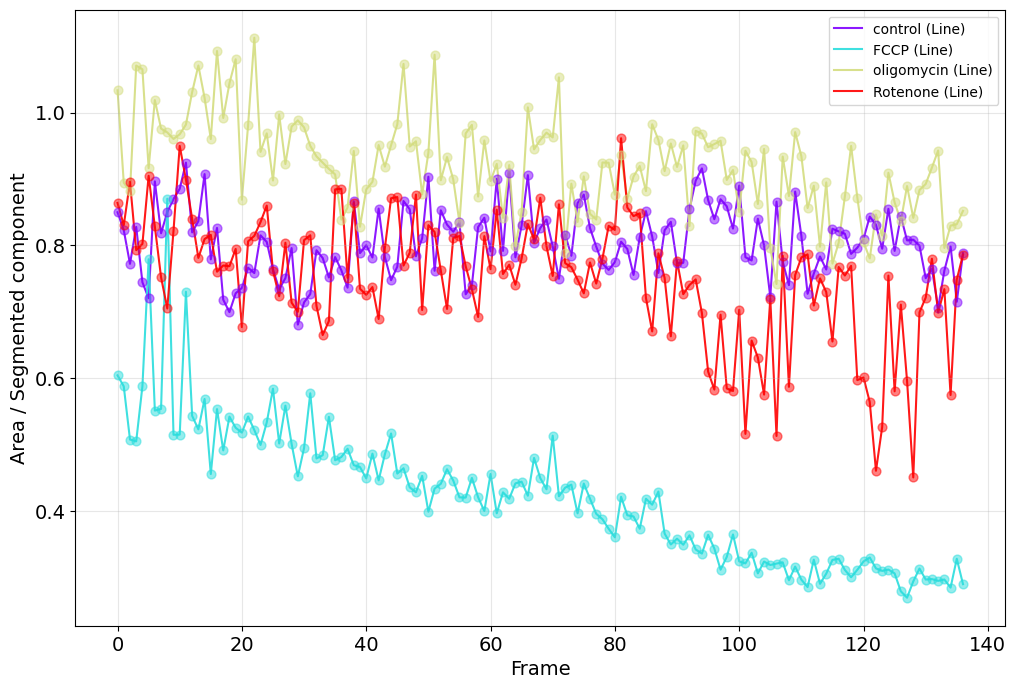

In [74]:
plot_multiple_line(
    frame_all, 
    area_per_rawLabel, 
    stream_file, 
    title=""
)

In [ ]:
area_per_rawLabel_pd = pd.DataFrame(np.transpose(area_per_rawLabel), columns=['control', 'FCCP', 'oligomycin', 'Rotenone'])
area_per_rawLabel_pd = area_per_rawLabel_pd.melt(var_name='toxin', value_name='event')
normality = pg.normality(data = area_per_rawLabel_pd, dv = 'event', group = 'toxin')
homogeneity = pg.homoscedasticity(data = area_per_rawLabel_pd, dv = 'event', group = 'toxin')
print(normality)
print(homogeneity)

print("fission") # shows all of then are significantly different 
#check the influence and correlation with Rank Biserial Correlation
print(pg.pairwise_tests(dv = 'event', between =  'toxin', data = area_per_rawLabel_pd, parametric=False,padjust='holm', effsize = 'r'))

                   W          pval  normal
toxin                                     
control     0.991918  6.230999e-01    True
FCCP        0.923642  9.989988e-07   False
oligomycin  0.987467  2.494227e-01    True
Rotenone    0.957916  3.255016e-04   False
                W          pval  equal_var
levene  14.314254  5.458690e-09      False
fission
  Contrast         A           B  Paired  Parametric   U-val alternative  \
0    toxin      FCCP    Rotenone   False       False   440.0   two-sided   
1    toxin      FCCP     control   False       False   180.0   two-sided   
2    toxin      FCCP  oligomycin   False       False    35.0   two-sided   
3    toxin  Rotenone     control   False       False  5916.0   two-sided   
4    toxin  Rotenone  oligomycin   False       False  1130.0   two-sided   
5    toxin   control  oligomycin   False       False  1779.0   two-sided   

          p-unc        p-corr p-adjust         r  
0  2.395598e-42  9.582391e-42     holm  0.490603  
1  9.659946e-

C:\Users\iceji\AppData\Local\Temp\ipykernel_12108\2142407604.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.boxplot(x='toxin', y='event', data=area_per_rawLabel_pd,  palette=colors, ax=ax, width=0.5)


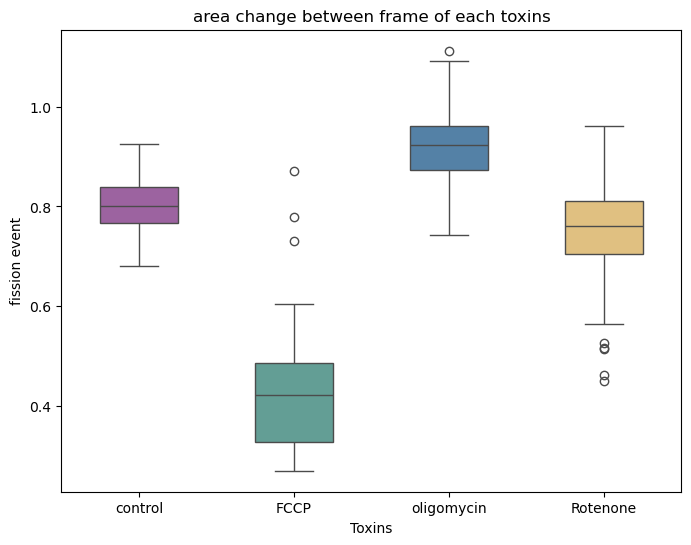

In [ ]:
import seaborn as sns

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

# Define colors for boxes
colors = ['#a559aa', '#59a89c', '#4682b4', '#f0c571']

# Create boxplot with Seaborn
bp = sns.boxplot(x='toxin', y='event', data=area_per_rawLabel_pd,  palette=colors, ax=ax, width=0.5)
ax.set(xlabel="Toxins", ylabel="fission event")

# Customize fliers (outliers)
for flier in ax.collections:  # Fliers are stored as PathCollection
    flier.set(marker='D', color='#e7298a', alpha=0.5)

# Set title and axis ticks
plt.title("area change between frame of each toxins")
ax.tick_params(axis='x', bottom=True)
ax.tick_params(axis='y', left=True)

# Show plot
plt.show()

In [ ]:
from scipy.stats import linregress
area_per_rawLabel_pd['frame'] = list(range(137)) * 4
slopes = {}
for condition in area_per_rawLabel_pd['toxin'].unique():
    subset = area_per_rawLabel_pd[area_per_rawLabel_pd['toxin'] == condition]
    slope, intercept, r_value, p_value, std_err = linregress(subset['frame'], subset['event'])
    slopes[condition] = slope

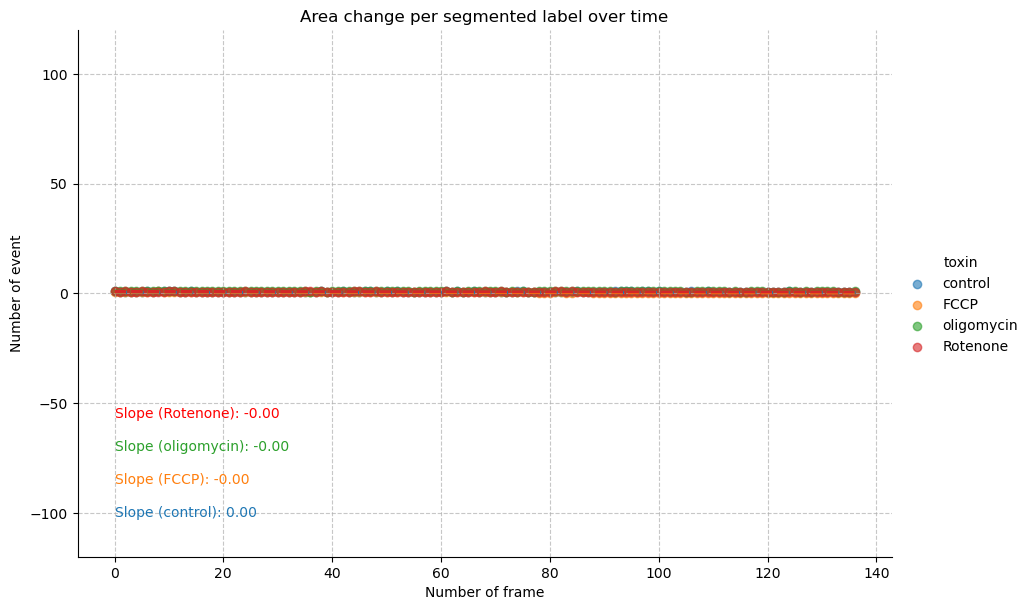

In [ ]:
sns.lmplot(data=area_per_rawLabel_pd, x='frame', y='event', hue='toxin', height=6, aspect=1.5,
           scatter_kws={'alpha': 0.6}, line_kws={'linestyle': '--'})
plt.title('Area change per segmented label over time')
plt.xlabel('Number of frame')
plt.ylabel('Number of event')
plt.ylim(-120, 120)  # Adjust based on your data range
plt.grid(True, linestyle='--', alpha=0.7)

i = -100
for condition, slope in slopes.items():
    plt.text(0, i, 
             f'Slope ({condition}): {slope:.2f}', 
             color=plt.gca().lines[0].get_color() if condition == 'control' else 
                   plt.gca().lines[1].get_color() if condition == 'FCCP' else 
                   plt.gca().lines[2].get_color() if condition == 'oligomycin' else 'red',
             ha='left', va='center')
    i +=15

### linear regression analysis

In [ ]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(frame_all[3], area_per_rawLabel['oligomycin'])
regression_line = slope * frame_all[1] + intercept


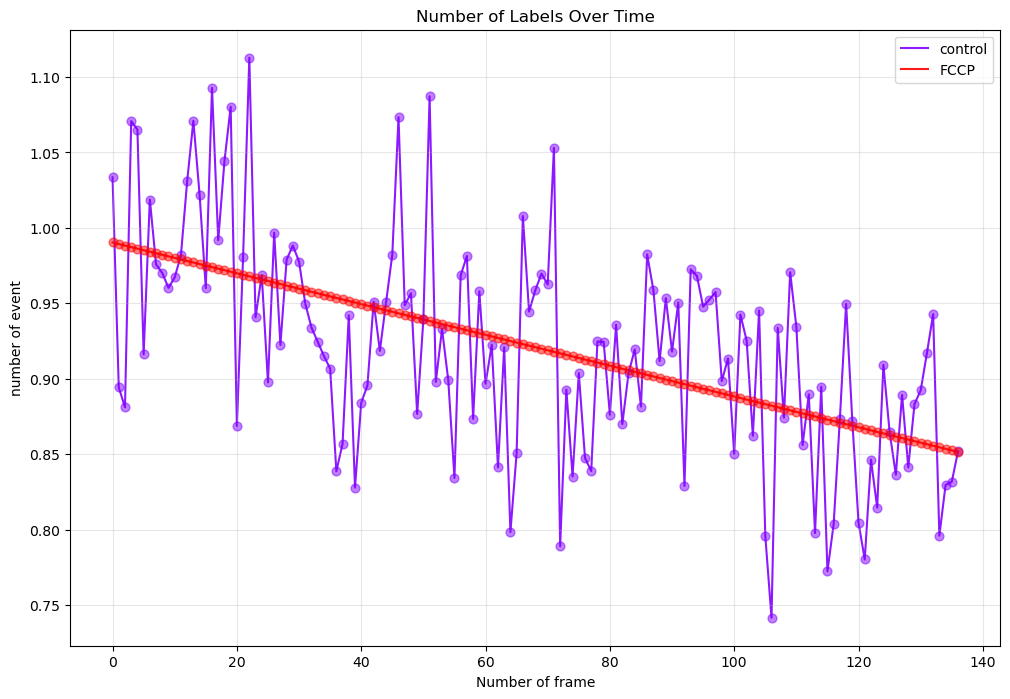

In [ ]:
area_per_rawLabel['oligomycin'].shape
df = area_per_rawLabel['oligomycin']
df.shape
np.expand_dims(df,axis=0).shape
plot_arr = np.concatenate((np.expand_dims(df,axis=0), regression_line[np.newaxis,:]), axis=0)
plot_multiple_line(
    frame_all[0:2], 
    plot_arr, 
    stream_file[0:2], 
    title="Number of Labels Over Time"
)

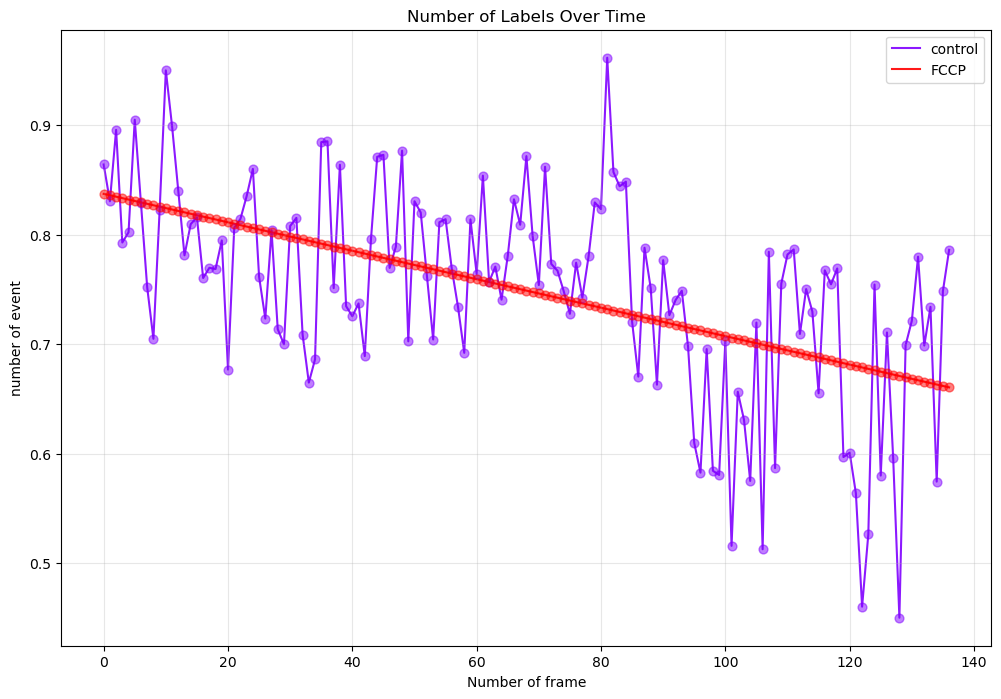

In [ ]:
slope, intercept, r_value, p_value, std_err = linregress(frame_all[3], area_per_rawLabel['rotenone'])
regression_line = slope * frame_all[1] + intercept

area_per_rawLabel['rotenone'].shape
df = area_per_rawLabel['rotenone']
df.shape
np.expand_dims(df,axis=0).shape
plot_arr = np.concatenate((np.expand_dims(df,axis=0), regression_line[np.newaxis,:]), axis=0)
plot_multiple_line(
    frame_all[0:2], 
    plot_arr, 
    stream_file[0:2], 
    title="Number of Labels Over Time"
)

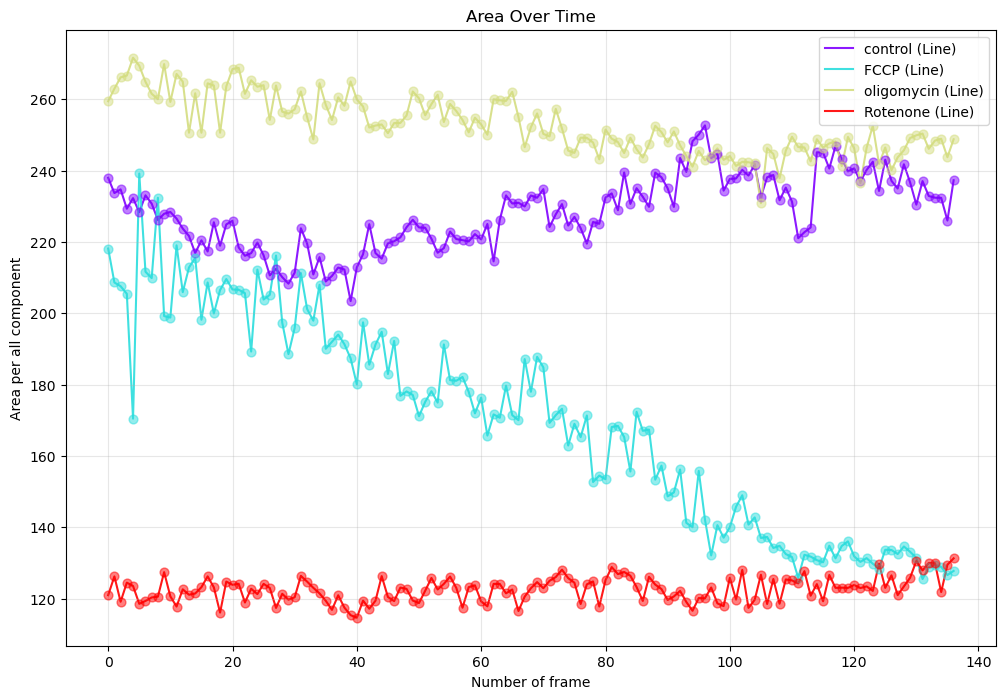

In [33]:
plot_multiple_line(
    frame_all, 
    corrected_area, 
    stream_file, 
    title="Area Over Time"
)

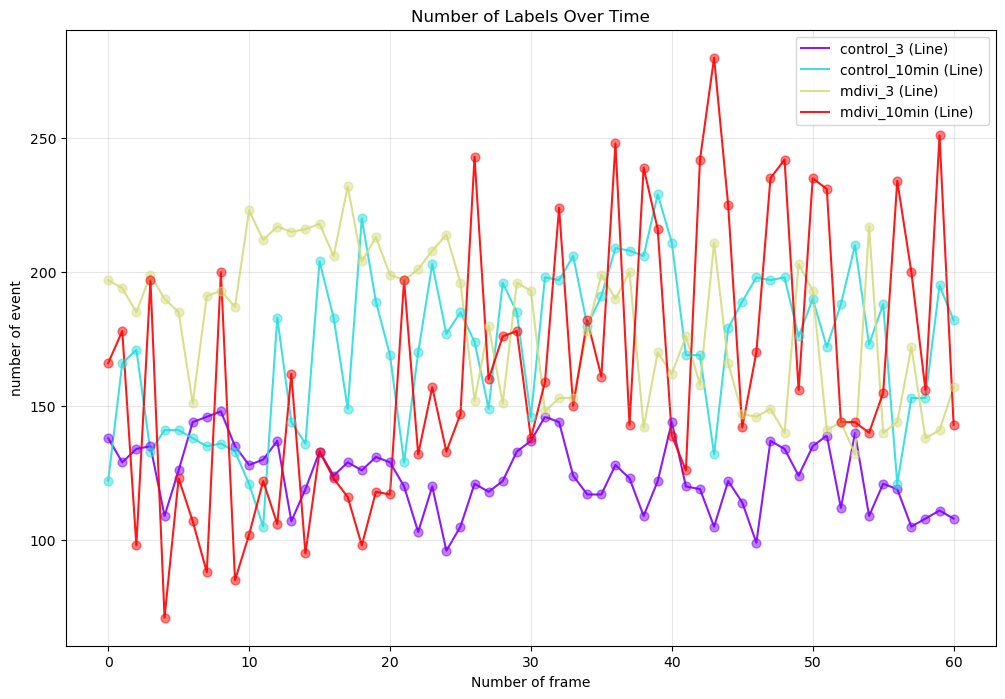

In [ ]:

plot_multiple_line(
    frame_mdivi, 
    raw_label_mdivi, 
    stream_file_mdivi, 
    title="Number of Labels Over Time"
)


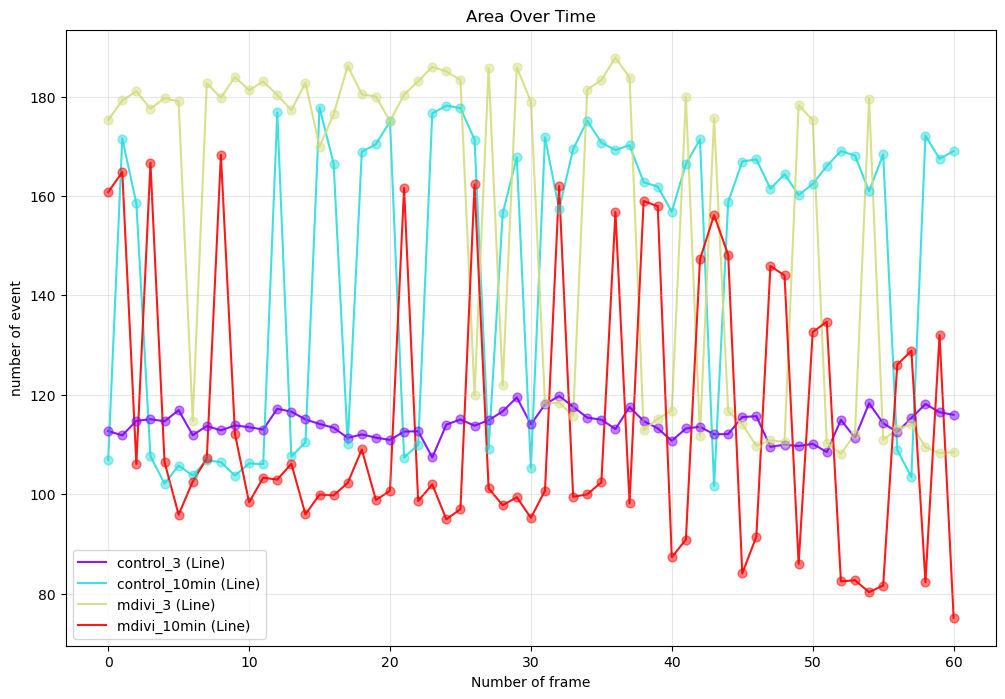

In [ ]:
plot_multiple_line(
    frame_mdivi, 
    area_mdivi, 
    stream_file_mdivi, 
    title="Area Over Time"
)

In [ ]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(frame_mdivi[3], raw_label_mdivi[3])
regression_line = slope * frame_mdivi[1] + intercept

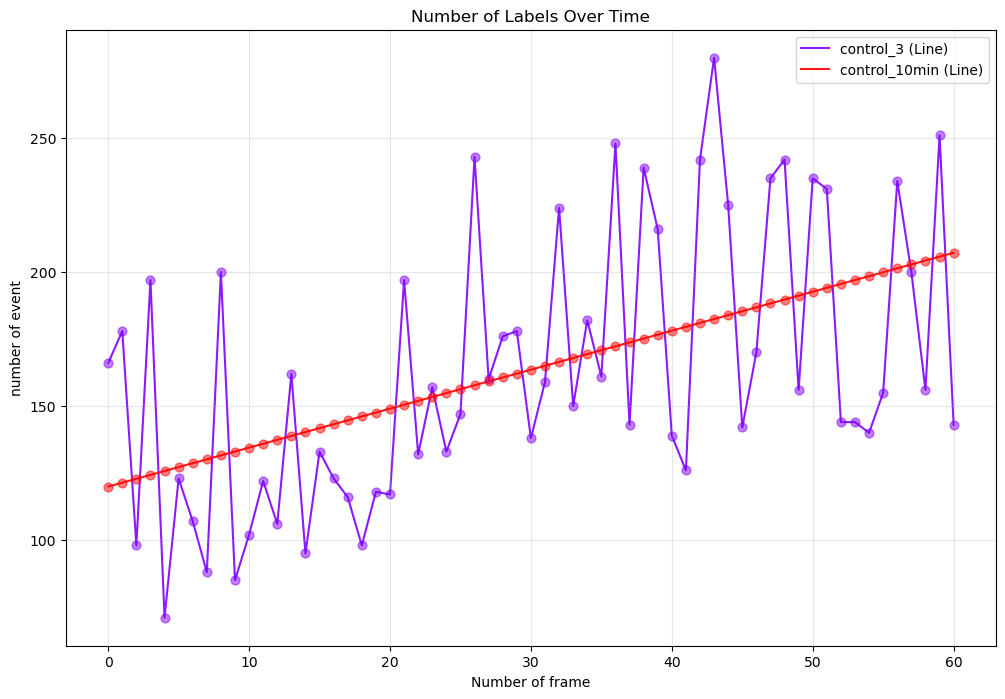

In [ ]:
plot_arr = np.concatenate((raw_label_mdivi[3][np.newaxis,:], regression_line[np.newaxis,:]), axis=0)
plot_multiple_line(
    frame_mdivi[0:2], 
    plot_arr, 
    stream_file_mdivi[0:2], 
    title="Number of Labels Over Time"
)

In [ ]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(frame_all[1], raw_label_all[1])
regression_line = slope * frame_all[1] + intercept

In [ ]:
plot_arr = np.concatenate((raw_label_all[1][np.newaxis,:], regression_line[np.newaxis,:]), axis=0)

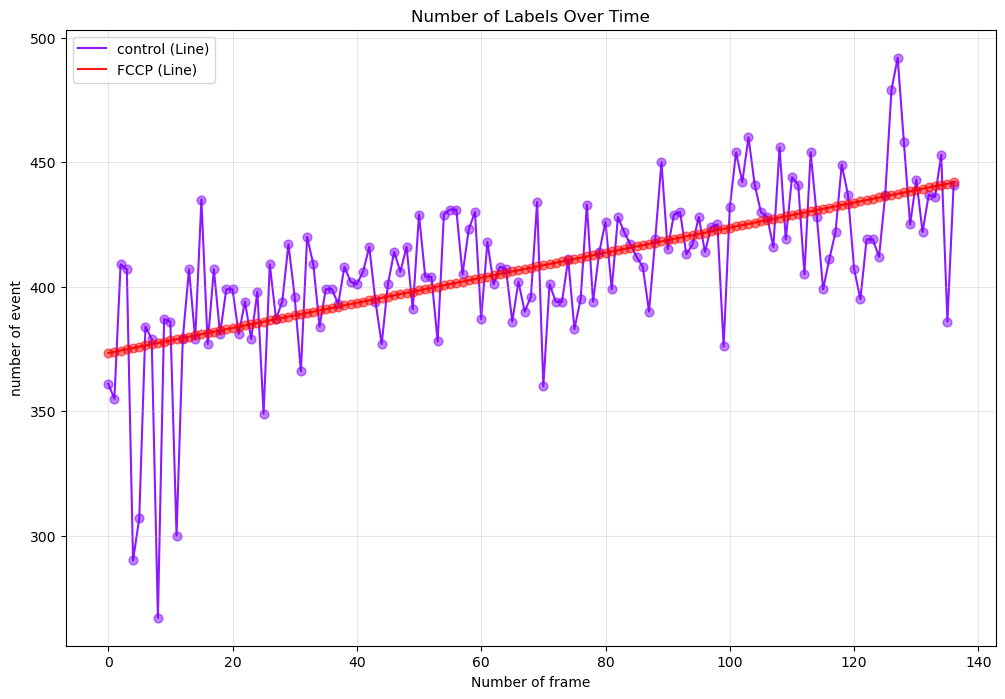

In [ ]:

plot_multiple_line(
    frame_all[0:2], 
    plot_arr, 
    stream_file[0:2], 
    title="Number of Labels Over Time"
)